In [1]:
import numpy as np
import pandas as pd
import quandl as qd
import matplotlib.pyplot as plt
from matplotlib import style
import math
import sklearn
from sklearn import preprocessing, cross_validation, svm
import statistics as stat 
import scipy.optimize as opt
import sys

C:\Users\Ludwig Prandtl\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [34]:
df_train=pd.read_csv('digit_recognition_train.csv',delimiter=',')
df_test=pd.read_csv('digit_recognition_test.csv',delimiter=',')
# print(df_test)

In [35]:
X = np.array(df_train.drop(['label'], 1))
y = np.array(df_train['label'])
X_test = np.array(df_test)
# print(X.shape,y.shape)

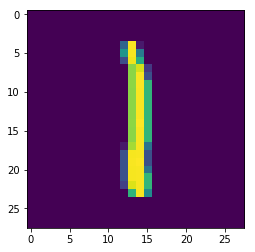

In [4]:
width = int(np.sqrt(X.shape[1]))
disp = np.array(np.zeros((width,width)))
for i in range(width):
    for j in range(width):
        disp[i][j]=X[1000][i*width +j]
        
plt.imshow(disp,interpolation='nearest')
plt.show()
X=np.c_[np.ones(X.shape[0]),X]
theta = np.array(np.zeros(X.shape[1]))

In [9]:
lam = 0.1
# print(X.shape)
k=10
theta = np.array(np.zeros((k,X.shape[1])))
# print(theta.shape)
theta = optimize(X,y,theta,k,lam)
# cost,hypo = costFunction(X,y,theta,lam)
# grade = gradient(X,y,theta,lam,hypo)
# print(cost)
# print(grade)

C:\Users\Ludwig Prandtl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\Ludwig Prandtl\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\Ludwig Prandtl\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys
C:\Users\Ludwig Prandtl\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Ludwig Prandtl\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


         Current function value: 0.025331
         Iterations: 49
         Function evaluations: 159
         Gradient evaluations: 147


C:\Users\Ludwig Prandtl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\Ludwig Prandtl\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\Ludwig Prandtl\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys
C:\Users\Ludwig Prandtl\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Ludwig Prandtl\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


         Current function value: 0.023301
         Iterations: 37
         Function evaluations: 172
         Gradient evaluations: 160


C:\Users\Ludwig Prandtl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\Ludwig Prandtl\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\Ludwig Prandtl\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys
C:\Users\Ludwig Prandtl\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Ludwig Prandtl\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


         Current function value: 0.070653
         Iterations: 50
         Function evaluations: 96
         Gradient evaluations: 96
         Current function value: 0.089100
         Iterations: 50
         Function evaluations: 108
         Gradient evaluations: 108
         Current function value: 0.049597
         Iterations: 50
         Function evaluations: 112
         Gradient evaluations: 112
         Current function value: 0.086812
         Iterations: 50
         Function evaluations: 109
         Gradient evaluations: 109
         Current function value: 0.039488
         Iterations: 50
         Function evaluations: 110
         Gradient evaluations: 110
         Current function value: 0.046091
         Iterations: 50
         Function evaluations: 106
         Gradient evaluations: 106


C:\Users\Ludwig Prandtl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\Ludwig Prandtl\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\Ludwig Prandtl\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


         Current function value: 0.693148
         Iterations: 0
         Function evaluations: 20
         Gradient evaluations: 16


C:\Users\Ludwig Prandtl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\Ludwig Prandtl\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\Ludwig Prandtl\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


         Current function value: 0.109514
         Iterations: 50
         Function evaluations: 98
         Gradient evaluations: 98


In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [6]:
def costFunction(theta,X,y,lam):
    m = y.shape[0]
#     print(theta.shape)
#     print(X.shape)
    theta_mul_x = np.dot(X,theta.T)
    hypo = sigmoid(theta_mul_x)
    lg1 = np.multiply(-1*y,np.log(hypo))
    lg2 = np.multiply(1-y,np.log(1-hypo))
    j = (np.sum(lg1-lg2))/m
    regularize = np.dot(theta,theta.T)
#     for i in range(theta.shape[1]):
#         if i!=0:
#             regularize += theta[i]*theta[i]
    regularize -= theta[0]* theta[0]
    regularize += lam/(2*m)
    j += regularize
    return j

In [7]:
def gradient(theta,X,y,lam):
    m=y.shape[0]
#     print(theta.shape)
#     print(X.shape)
    theta_mul_x = np.dot(X,theta.T)
    hypo = sigmoid(theta_mul_x)
    grade = np.array(np.zeros(theta.shape[0]))
    temp = X[:,0] 
#     print( temp.shape)
    for i in range(theta.shape[0]):
        if i==0:
            grade[i] = (np.sum(np.multiply((hypo - y),X[:,i]))) /m
        else :
            grade[i] = ((np.sum(np.multiply((hypo - y),X[:,i]))) /m) + (lam/m) * theta[i]
    return grade
            

In [8]:
def optimize(X,y,theta,k,lam):
    for i in range(k):
        digit_class = i
        theta[i] = opt.fmin_cg(f=costFunction,x0=theta[i],fprime=gradient,args = (X,(y==digit_class).flatten(),lam),maxiter=50) # y==digit_class means for digit_class i if i equals y then y is 1 otherwise y is 0 
    return theta

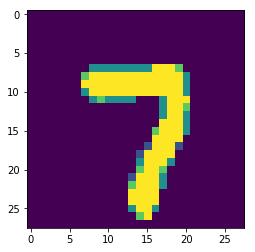

In [32]:
width2 = int(np.sqrt(X_test.shape[1]))
disp2 = np.array(np.zeros((width2,width2)))
for i in range(width2):
    for j in range(width2):
        disp2[i][j]=X_test[24][i*width2 +j]
        
plt.imshow(disp2,interpolation='nearest')
plt.show()

In [14]:
X_test=np.c_[np.ones(X_test.shape[0]),X_test]

In [33]:
ans = predict(theta,X_test,24)
print(ans)

(array([7], dtype=int64),)


In [15]:
def predict(theta,X,row):
    temp = X[row]
    res = np.dot(theta,temp.T)
#     m = theta.shape[0]
    ans = np.where(res==np.amax(res))
    return ans